In [2]:
pip install spotipy

     |████████████████████████████████| 138 kB 7.7 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
spotipy_client_id = '8e5f7a6e27724509b86fa855e2b8edfc'
spotipy_client_secret = '224a7e97532e4fcba1e991588bca978a'

auth_manager = SpotifyClientCredentials(client_id=spotipy_client_id,client_secret=spotipy_client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [5]:
all_letters = 'a b c d e f g h i j k l m n o p q r s t u v x y z 0 1 2 3 4 5 6 7 8 9'
start = all_letters.split()
print(start)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


Searching for the songs

In [6]:
def Get_features(t_id):
  meta = sp.track(t_id)
  features = sp.audio_features(t_id)

  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']

  track = [name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature]

  return track

In [7]:
def Get_songs():
  tracks = []
  for i in start:
    song = sp.search(i,limit=50)
    for j in range(50):
      t_id = song['tracks']['items'][j]['id']
      track = Get_features(t_id)
      tracks.append(track)

  df = pd.DataFrame(tracks,columns=['name','album','artist','release_date','length','popularity','acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','time_signature'])
  return df

In [8]:
df = Get_songs()
df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,abcdefu,abcdefu,GAYLE,2021-08-13,168601,100,0.2990,0.695,0.540,0.000000,0.3670,-5.692,0.0493,121.932,4
1,All Too Well (10 Minute Version) (Taylor's Ver...,Red (Taylor's Version),Taylor Swift,2021-11-12,613026,93,0.2740,0.631,0.518,0.000000,0.0880,-8.771,0.0303,93.023,4
2,We Don't Talk About Bruno,Encanto (Original Motion Picture Soundtrack),Lin-Manuel Miranda,2021-11-19,216120,92,0.3570,0.577,0.450,0.000000,0.1110,-8.516,0.0834,205.863,4
3,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,1994-11-01,241106,94,0.1640,0.336,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4
4,Enemy (with JID) - from the series Arcane Leag...,Enemy (with JID) [from the series Arcane Leagu...,Imagine Dragons,2021-10-28,173381,98,0.2370,0.728,0.783,0.000000,0.4340,-4.424,0.2660,77.011,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,9,You Tell Me,Croosh,2020-10-14,169014,24,0.0599,0.696,0.573,0.008720,0.1160,-6.803,0.0493,142.037,4
1746,999 (with Camilo),999 (with Camilo),Selena Gomez,2021-08-26,224168,75,0.1050,0.781,0.748,0.000000,0.1560,-4.604,0.2420,149.819,4
1747,9,Layers,AAESPO,2017-02-01,63131,21,0.9940,0.284,0.217,0.937000,0.1170,-13.046,0.0402,77.232,4
1748,911,Temazos pal bailoteo,Various Artists,2022-01-10,221760,2,0.0519,0.798,0.857,0.000050,0.1420,-3.748,0.1050,102.998,4


In [9]:
df.shape

(1750, 15)

Storing the data in a csv file

In [10]:
df.to_csv("spotify_data.csv",sep=',')
df = pd.read_csv("spotify_data.csv")

In [11]:
df

,Unnamed: 0,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,abcdefu,abcdefu,GAYLE,2021-08-13,168601,100,0.2990,0.695,0.540,0.000000,0.3670,-5.692,0.0493,121.932,4
1,1,All Too Well (10 Minute Version) (Taylor's Ver...,Red (Taylor's Version),Taylor Swift,2021-11-12,613026,93,0.2740,0.631,0.518,0.000000,0.0880,-8.771,0.0303,93.023,4
2,2,We Don't Talk About Bruno,Encanto (Original Motion Picture Soundtrack),Lin-Manuel Miranda,2021-11-19,216120,92,0.3570,0.577,0.450,0.000000,0.1110,-8.516,0.0834,205.863,4
3,3,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,1994-11-01,241106,94,0.1640,0.336,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4
4,4,Enemy (with JID) - from the series Arcane Leag...,Enemy (with JID) [from the series Arcane Leagu...,Imagine Dragons,2021-10-28,173381,98,0.2370,0.728,0.783,0.000000,0.4340,-4.424,0.2660,77.011,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,1745,9,You Tell Me,Croosh,2020-10-14,169014,24,0.0599,0.696,0.573,0.008720,0.1160,-6.803,0.0493,142.037,4
1746,1746,999 (with Camilo),999 (with Camilo),Selena Gomez,2021-08-26,224168,75,0.1050,0.781,0.748,0.000000,0.1560,-4.604,0.2420,149.819,4
1747,1747,9,Layers,AAESPO,2017-02-01,63131,21,0.9940,0.284,0.217,0.937000,0.1170,-13.046,0.0402,77.232,4
1748,1748,911,Temazos pal bailoteo,Various Artists,2022-01-10,221760,2,0.0519,0.798,0.857,0.000050,0.1420,-3.748,0.1050,102.998,4


In [12]:
df = df.drop('Unnamed: 0',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1750 non-null   object 
 1   album             1750 non-null   object 
 2   artist            1750 non-null   object 
 3   release_date      1750 non-null   object 
 4   length            1750 non-null   int64  
 5   popularity        1750 non-null   int64  
 6   acousticness      1750 non-null   float64
 7   danceability      1750 non-null   float64
 8   energy            1750 non-null   float64
 9   instrumentalness  1750 non-null   float64
 10  liveness          1750 non-null   float64
 11  loudness          1750 non-null   float64
 12  speechiness       1750 non-null   float64
 13  tempo             1750 non-null   float64
 14  time_signature    1750 non-null   int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 205.2+ KB


In [13]:
df.describe()

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000
mean,204711.721714,71.104571,0.271360,0.628337,0.591839,0.080800,0.184986,-7.942917,0.123192,121.981033,3.918857
std,65069.896988,22.235728,0.292769,0.178458,0.202995,0.234173,0.141469,4.775660,0.120435,32.633373,0.455246
min,31000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-40.073000,0.000000,0.000000,0.000000
25%,166043.750000,66.000000,0.027350,0.534000,0.475000,0.000000,0.097900,-8.753500,0.039425,95.558250,4.000000
50%,200547.000000,79.000000,0.153000,0.650000,0.609500,0.000000,0.124000,-6.876000,0.063900,120.212500,4.000000
75%,232349.000000,85.000000,0.435500,0.761000,0.739750,0.000329,0.237000,-5.362500,0.170250,142.981000,4.000000
max,613026.000000,100.000000,0.994000,0.980000,1.000000,0.992000,0.954000,0.011000,0.943000,206.247000,5.000000


In [14]:
df['length'] = df['length']/60000

In [15]:
df.sort_values("popularity",ascending=True)

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
844,QUE PRETENDES,Latino Festivo Vol. 3,Various Artists,2022-01-18,3.705767,0,0.0275,0.639,0.791,0.00000,0.3620,-4.443,0.2540,92.603,4
1328,The Lucky One (Taylor's Version),Red (Taylor’s Version): She Wrote A Song About...,Taylor Swift,2022-01-18,4.007950,0,0.0781,0.690,0.558,0.00000,0.0591,-7.295,0.0553,117.865,4
813,Que Tire Pa Lante,Temazos pal bailoteo,Various Artists,2022-01-10,3.508667,0,0.0478,0.659,0.901,0.00000,0.1480,-2.814,0.0358,93.979,4
832,Quiero Decirte,Tardes de Ritmos,Various Artists,2022-01-17,3.769333,0,0.0623,0.623,0.721,0.00000,0.0745,-4.933,0.0741,181.960,4
843,quiero sentirme bien,Calorcito & Relax,Various Artists,2022-01-17,3.706383,0,0.4300,0.779,0.380,0.00307,0.3680,-9.753,0.0361,130.016,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Enemy (with JID) - from the series Arcane Leag...,Enemy (with JID) [from the series Arcane Leagu...,Imagine Dragons,2021-10-28,2.889683,98,0.2370,0.728,0.783,0.00000,0.4340,-4.424,0.2660,77.011,4
200,Enemy (with JID) - from the series Arcane Leag...,Enemy (with JID) [from the series Arcane Leagu...,Imagine Dragons,2021-10-28,2.889683,98,0.2370,0.728,0.783,0.00000,0.4340,-4.424,0.2660,77.011,4
704,Enemy (with JID) - from the series Arcane Leag...,Enemy (with JID) [from the series Arcane Leagu...,Imagine Dragons,2021-10-28,2.889683,98,0.2370,0.728,0.783,0.00000,0.4340,-4.424,0.2660,77.011,4
312,abcdefu,abcdefu,GAYLE,2021-08-13,2.810017,100,0.2990,0.695,0.540,0.00000,0.3670,-5.692,0.0493,121.932,4


In [16]:
df = df[df["popularity"]>60]

In [17]:
df.sort_values("name",ascending=False)

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1684,『82.99 F.M』,A Millions Miles Away,Macross 82-99,2014-05-07,2.504333,61,0.0155,0.559,0.9050,0.002830,0.3160,-5.362,0.1500,114.830,4
1652,‘87 Stingray,Alone At Prom,Tory Lanez,2021-12-10,2.355550,71,0.1390,0.498,0.9310,0.000005,0.1110,-6.182,0.0737,193.434,3
815,¿Qué Tengo Que Hacer?,Talento de Barrio,Daddy Yankee,2008-08-12,3.641767,69,0.0766,0.758,0.8950,0.000059,0.2960,-3.950,0.0686,107.995,4
1196,you were good to me,brent,Jeremy Zucker,2019-05-03,3.652433,81,0.9130,0.561,0.0848,0.000026,0.1120,-15.099,0.0404,102.128,4
1233,you were good to me,brent,Jeremy Zucker,2019-05-03,3.652433,81,0.9130,0.561,0.0848,0.000026,0.1120,-15.099,0.0404,102.128,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,"...And to Those I Love, Thanks for Sticking Ar...",Stop Staring at the Shadows,$uicideboy$,2020-02-14,2.808150,85,0.1240,0.792,0.5110,0.000090,0.1400,-6.876,0.0409,113.983,4
1384,"...And to Those I Love, Thanks for Sticking Ar...",Stop Staring at the Shadows,$uicideboy$,2020-02-14,2.808150,85,0.1240,0.792,0.5110,0.000090,0.1400,-6.876,0.0409,113.983,4
1174,"...And to Those I Love, Thanks for Sticking Ar...",Stop Staring at the Shadows,$uicideboy$,2020-02-14,2.808150,85,0.1240,0.792,0.5110,0.000090,0.1400,-6.876,0.0409,113.983,4
1210,"'Zat You, Santa Claus? - Single Version",Ella & Louis Christmas,Ella Fitzgerald,2016-11-25,2.677333,70,0.7530,0.704,0.5510,0.000000,0.2000,-5.479,0.1530,123.341,4


In [18]:
df.drop_duplicates(keep='first',inplace=True)
df.sort_values("name",ascending=False)

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1684,『82.99 F.M』,A Millions Miles Away,Macross 82-99,2014-05-07,2.504333,61,0.0155,0.559,0.9050,0.002830,0.3160,-5.362,0.1500,114.830,4
1652,‘87 Stingray,Alone At Prom,Tory Lanez,2021-12-10,2.355550,71,0.1390,0.498,0.9310,0.000005,0.1110,-6.182,0.0737,193.434,3
815,¿Qué Tengo Que Hacer?,Talento de Barrio,Daddy Yankee,2008-08-12,3.641767,69,0.0766,0.758,0.8950,0.000059,0.2960,-3.950,0.0686,107.995,4
1196,you were good to me,brent,Jeremy Zucker,2019-05-03,3.652433,81,0.9130,0.561,0.0848,0.000026,0.1120,-15.099,0.0404,102.128,4
1161,you broke me first,you broke me first,Tate McRae,2020-04-17,2.821083,88,0.7850,0.667,0.3730,0.000000,0.0906,-9.389,0.0500,124.148,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,0 To 100 / The Catch Up,0 To 100 / The Catch Up,Drake,2013-07-14,4.587100,73,0.7370,0.559,0.7160,0.000000,0.2520,-3.964,0.3900,176.618,4
1257,"0 Sentimientos (Remix) [feat. Noriel, Darkiel,...","0 Sentimientos (Remix) [feat. Noriel, Darkiel,...",Jon Z,2016-11-24,5.595600,71,0.1550,0.894,0.7210,0.000000,0.1540,-5.829,0.2580,107.963,4
19,"...And to Those I Love, Thanks for Sticking Ar...",Stop Staring at the Shadows,$uicideboy$,2020-02-14,2.808150,85,0.1240,0.792,0.5110,0.000090,0.1400,-6.876,0.0409,113.983,4
1210,"'Zat You, Santa Claus? - Single Version",Ella & Louis Christmas,Ella Fitzgerald,2016-11-25,2.677333,70,0.7530,0.704,0.5510,0.000000,0.2000,-5.479,0.1530,123.341,4


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 1749
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              981 non-null    object 
 1   album             981 non-null    object 
 2   artist            981 non-null    object 
 3   release_date      981 non-null    object 
 4   length            981 non-null    float64
 5   popularity        981 non-null    int64  
 6   acousticness      981 non-null    float64
 7   danceability      981 non-null    float64
 8   energy            981 non-null    float64
 9   instrumentalness  981 non-null    float64
 10  liveness          981 non-null    float64
 11  loudness          981 non-null    float64
 12  speechiness       981 non-null    float64
 13  tempo             981 non-null    float64
 14  time_signature    981 non-null    int64  
dtypes: float64(9), int64(2), object(4)
memory usage: 122.6+ KB


Analysis

<Figure size 1440x1008 with 0 Axes>

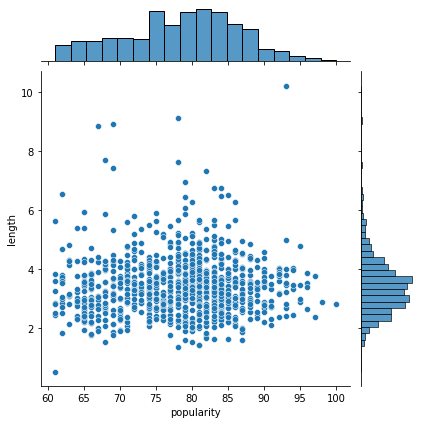

In [20]:
plt.figure(figsize=(20,14))
ax = sns.jointplot(x=df.popularity,y=df['length'],data=df)

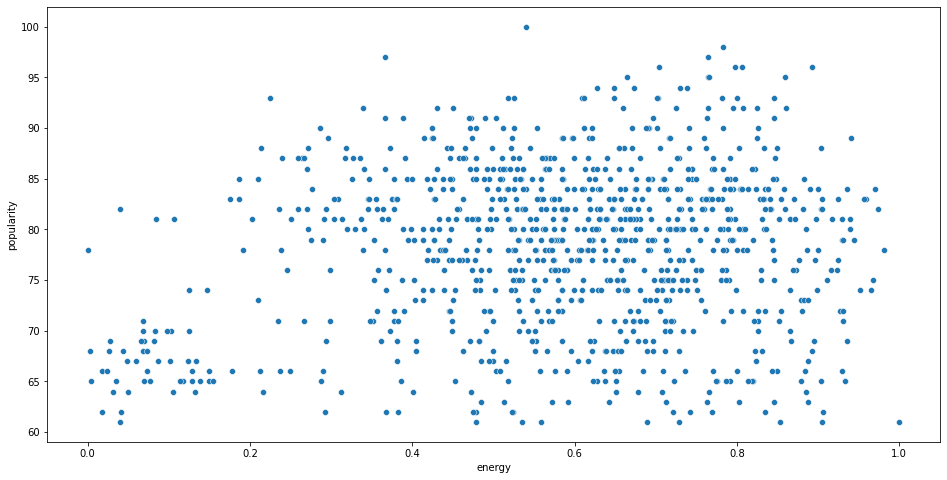

In [21]:
plt.figure(figsize=(16,8))
ax = sns.scatterplot(x=df.energy,y=df.popularity,data=df)

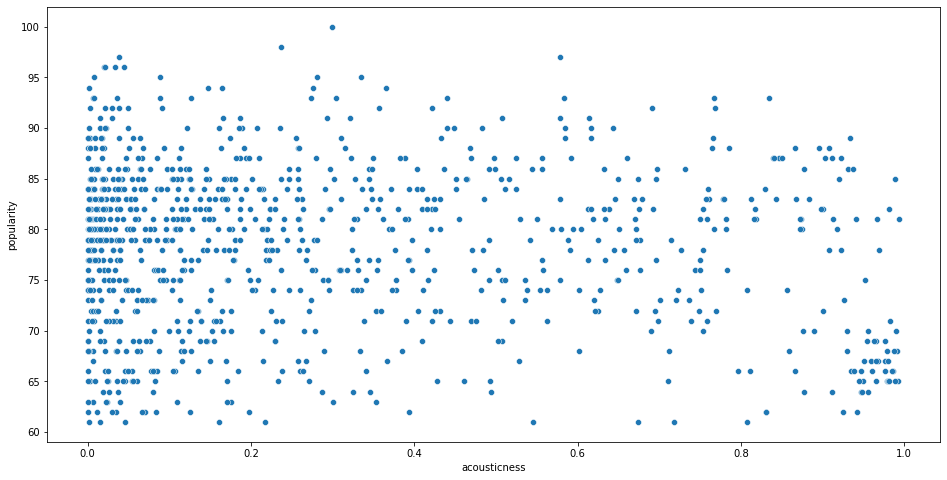

In [22]:
plt.figure(figsize=(16,8))
ax = sns.scatterplot(x=df.acousticness,y=df.popularity,data=df)

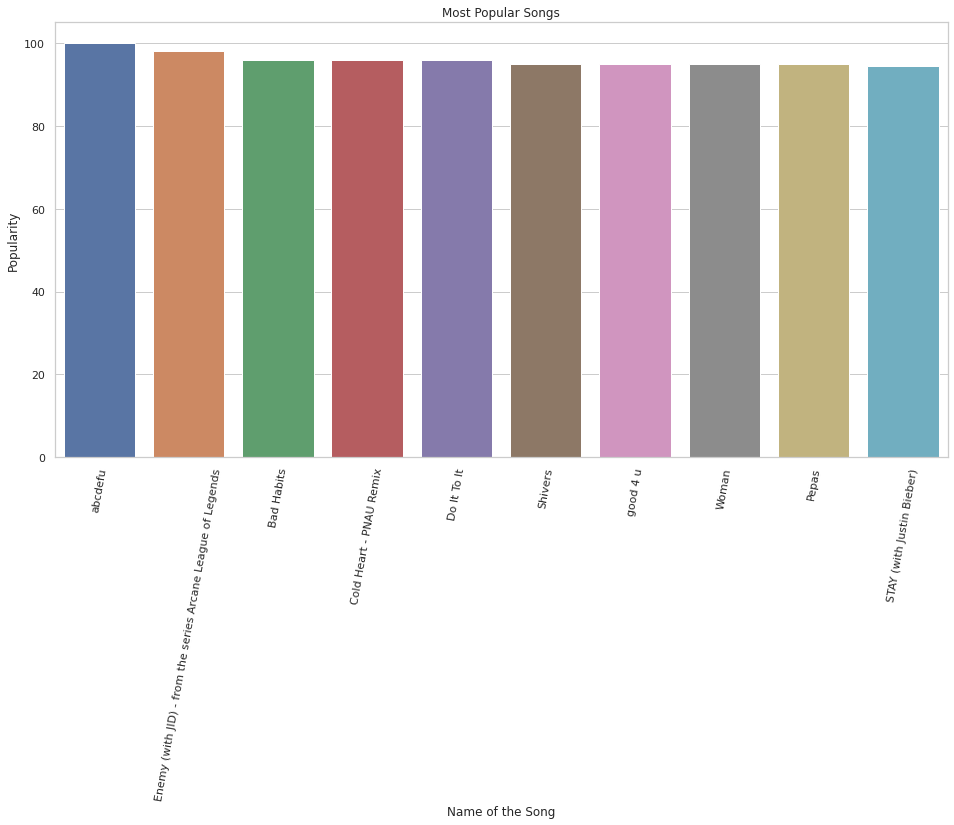

In [27]:
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
x = df.groupby("name")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x=x.index,y=x)
ax.set_title('Most Popular Songs')
ax.set_ylabel('Popularity')
ax.set_xlabel('Name of the Song')
plt.xticks(rotation = 80)
plt.show()

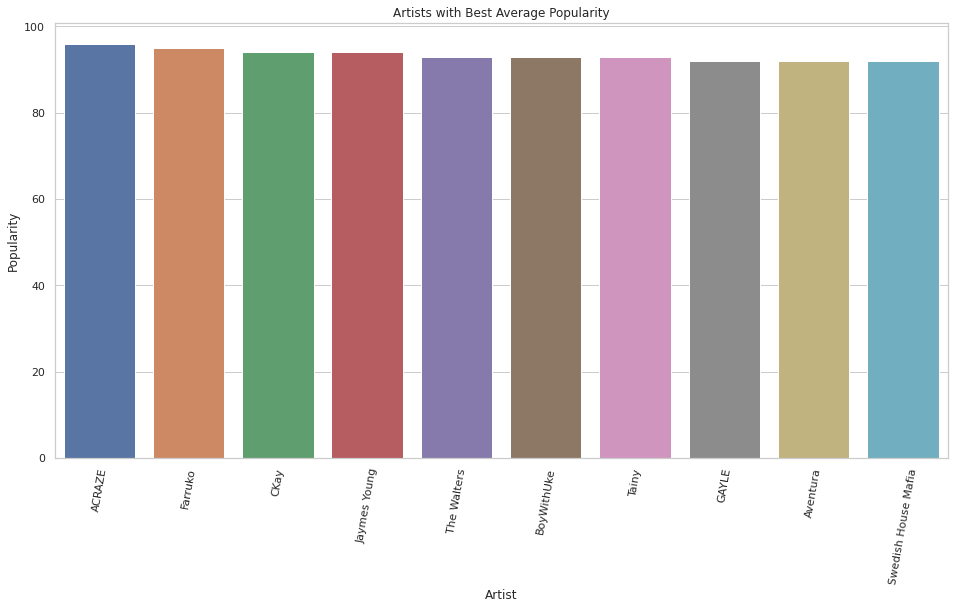

In [28]:
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
x = df.groupby("artist")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x=x.index,y=x)
ax.set_title('Artists with Best Average Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artist')
plt.xticks(rotation = 80)
plt.show()

<Figure size 1152x576 with 0 Axes>

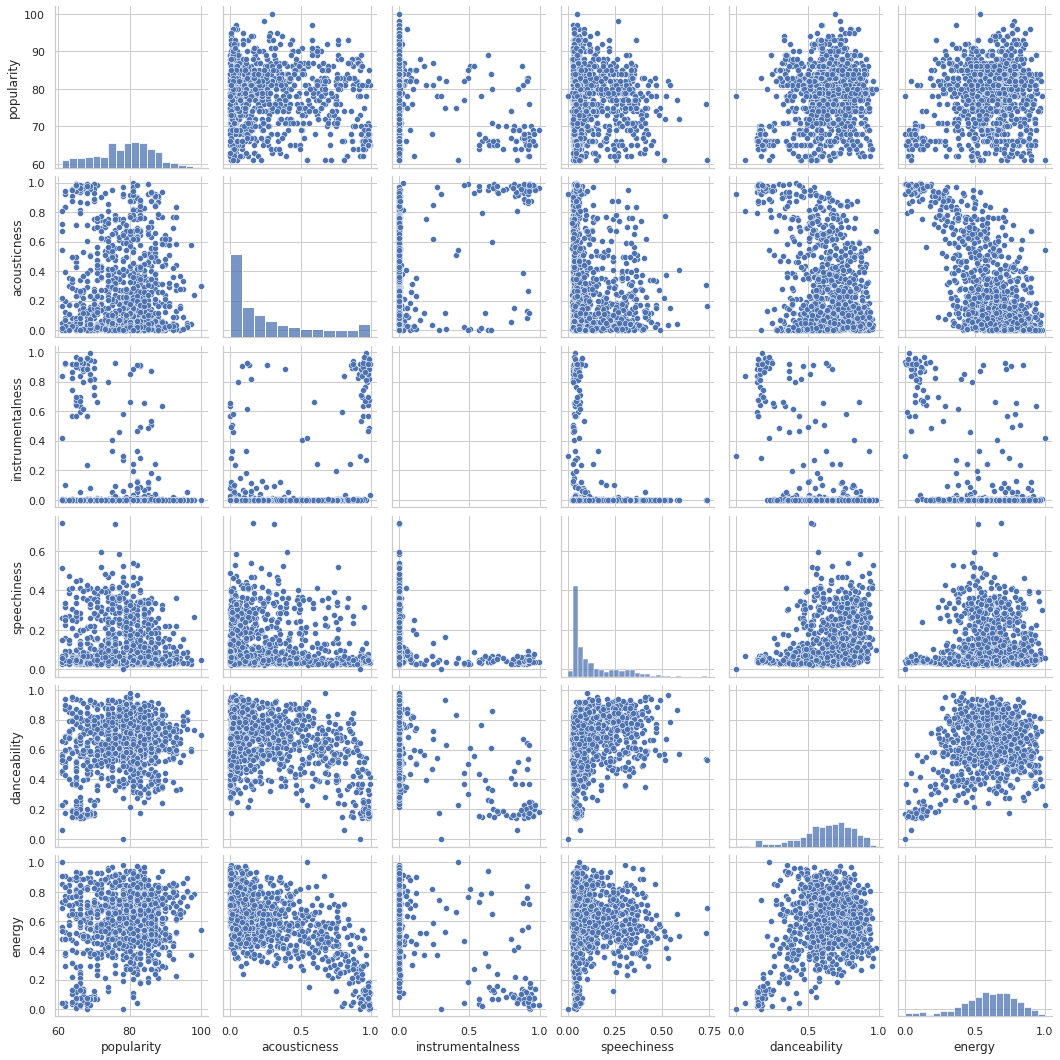

In [29]:
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
cols = ["popularity","acousticness","instrumentalness","speechiness","danceability","energy"]
sns.pairplot(df[cols],height=2.5)
plt.show()

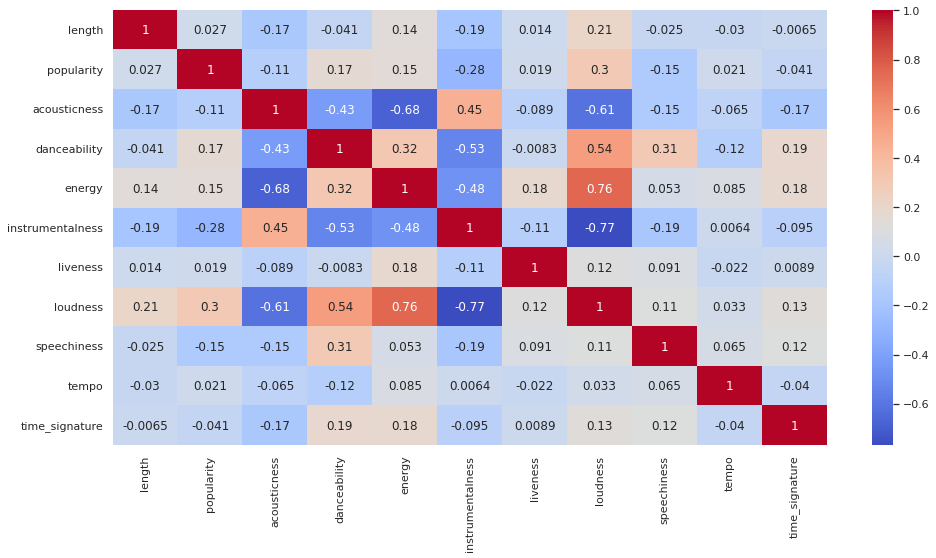

In [30]:
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

Pre-processing

In [31]:
df2 = df.drop(['release_date','name','album','artist','popularity'],axis=1)
df2

,length,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,2.810017,0.2990,0.695,0.5400,0.000000,0.3670,-5.692,0.0493,121.932,4
1,10.217100,0.2740,0.631,0.5180,0.000000,0.0880,-8.771,0.0303,93.023,4
2,3.602000,0.3570,0.577,0.4500,0.000000,0.1110,-8.516,0.0834,205.863,4
3,4.018433,0.1640,0.336,0.6270,0.000000,0.0708,-7.463,0.0384,150.273,4
4,2.889683,0.2370,0.728,0.7830,0.000000,0.4340,-4.424,0.2660,77.011,4
...,...,...,...,...,...,...,...,...,...,...
1740,2.944000,0.0388,0.932,0.5470,0.000000,0.0924,-7.787,0.3330,94.998,4
1742,2.718167,0.9810,0.177,0.0767,0.921000,0.1050,-28.003,0.0470,136.521,4
1744,2.944000,0.0388,0.932,0.5470,0.000000,0.0924,-7.787,0.3330,94.998,4
1746,3.736133,0.1050,0.781,0.7480,0.000000,0.1560,-4.604,0.2420,149.819,4


In [32]:
scaler = StandardScaler()
df2 = pd.DataFrame(scaler.fit_transform(df2),columns=df2.columns)
df2

,length,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,-0.620787,0.058896,0.338273,-0.251822,-0.295986,1.282879,0.429342,-0.632941,-0.023587,0.171877
1,6.881469,-0.025245,-0.013308,-0.360099,-0.295986,-0.682132,-0.151497,-0.791393,-0.955543,0.171877
2,0.181373,0.254103,-0.309955,-0.694775,-0.295986,-0.520142,-0.103392,-0.348560,2.682146,0.171877
3,0.603157,-0.395466,-1.633878,0.176366,-0.295986,-0.803273,0.095251,-0.723843,0.890058,0.171877
4,-0.540096,-0.149774,0.519557,0.944152,-0.295986,1.754764,0.668544,1.174253,-1.471732,0.171877
...,...,...,...,...,...,...,...,...,...,...
976,-0.485082,-0.816845,1.640223,-0.217370,-0.295986,-0.651143,0.034130,1.733007,-0.891874,0.171877
977,-0.713817,2.354266,-2.507338,-2.532046,4.158065,-0.562400,-3.779522,-0.652122,0.446727,0.171877
978,-0.485082,-0.816845,1.640223,-0.217370,-0.295986,-0.651143,0.034130,1.733007,-0.891874,0.171877
979,0.317229,-0.594039,0.810711,0.771892,-0.295986,-0.203205,0.634588,0.974102,0.875423,0.171877


Clustering

In [33]:
wcss = [] #wcss stands for within cluster sum of squares
for i in range(1,11):
  model = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=1000,random_state=42)
  model.fit(df2)
  wcss.append(model.inertia_)

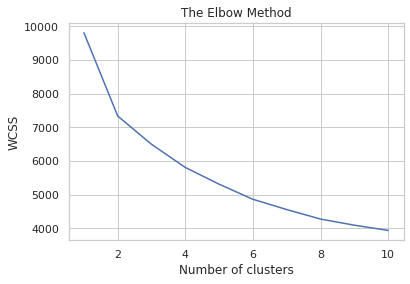

In [34]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [35]:
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=500,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(df2)

In [36]:
df['cluster'] = y_kmeans
df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,abcdefu,abcdefu,GAYLE,2021-08-13,2.810017,100,0.2990,0.695,0.5400,0.000000,0.3670,-5.692,0.0493,121.932,4,2
1,All Too Well (10 Minute Version) (Taylor's Ver...,Red (Taylor's Version),Taylor Swift,2021-11-12,10.217100,93,0.2740,0.631,0.5180,0.000000,0.0880,-8.771,0.0303,93.023,4,2
2,We Don't Talk About Bruno,Encanto (Original Motion Picture Soundtrack),Lin-Manuel Miranda,2021-11-19,3.602000,92,0.3570,0.577,0.4500,0.000000,0.1110,-8.516,0.0834,205.863,4,3
3,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,1994-11-01,4.018433,94,0.1640,0.336,0.6270,0.000000,0.0708,-7.463,0.0384,150.273,4,2
4,Enemy (with JID) - from the series Arcane Leag...,Enemy (with JID) [from the series Arcane Leagu...,Imagine Dragons,2021-10-28,2.889683,98,0.2370,0.728,0.7830,0.000000,0.4340,-4.424,0.2660,77.011,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,223's (feat. 9lokknine),223's (feat. 9lokknine),YNW Melly,2019-08-09,2.944000,69,0.0388,0.932,0.5470,0.000000,0.0924,-7.787,0.3330,94.998,4,0
1742,963 Hz Activate Pineal Gland,963 Hz Returning to Oneness,Miracle Tones,2019-10-24,2.718167,65,0.9810,0.177,0.0767,0.921000,0.1050,-28.003,0.0470,136.521,4,1
1744,223's (feat. 9lokknine),Melly vs. Melvin,YNW Melly,2019-11-22,2.944000,69,0.0388,0.932,0.5470,0.000000,0.0924,-7.787,0.3330,94.998,4,0
1746,999 (with Camilo),999 (with Camilo),Selena Gomez,2021-08-26,3.736133,75,0.1050,0.781,0.7480,0.000000,0.1560,-4.604,0.2420,149.819,4,0


In [37]:
clus_0 = df[df["cluster"]==0]
clus_1 = df[df["cluster"]==1]
clus_2 = df[df["cluster"]==2]
clus_3 = df[df["cluster"]==3]

In [40]:
df.cluster.value_counts()

2    523
0    208
3    196
1     54
Name: cluster, dtype: int64

In [49]:
df[['cluster','energy']].head(10)

,cluster,energy
0,2,0.540
1,2,0.518
2,3,0.450
3,2,0.627
4,0,0.783
5,0,0.529
6,3,0.472
7,2,0.599
8,2,0.495
9,2,0.470


Clsuter 0 has high speechiness and acousticeness.

Instrumentalness is higher in cluster 1.

Cluster 2 has high energy songs.

Cluster 2 and 3 have some similiar features.

In [53]:
df_result = pd.DataFrame(clus_0.mean(),columns=['Rap'])
df_result.insert(1,"New Age",clus_1.mean())
df_result.insert(2,"Pop",clus_2.mean())
df_result.insert(3,"Alternative",clus_3.mean())

In [54]:
df_result

,Rap,New Age,Pop,Alternative
length,3.248518,2.505434,3.584419,3.429879
popularity,76.600962,68.240741,79.382409,79.964286
acousticness,0.188872,0.947370,0.125331,0.613064
danceability,0.745385,0.207454,0.653616,0.578082
energy,0.598606,0.110160,0.697092,0.433142
instrumentalness,0.001471,0.802759,0.027377,0.010547
liveness,0.203484,0.107215,0.193326,0.163856
loudness,-7.042447,-26.481037,-6.102057,-8.828321
speechiness,0.319154,0.046241,0.076076,0.072184
tempo,127.575615,123.808463,122.818277,116.722990


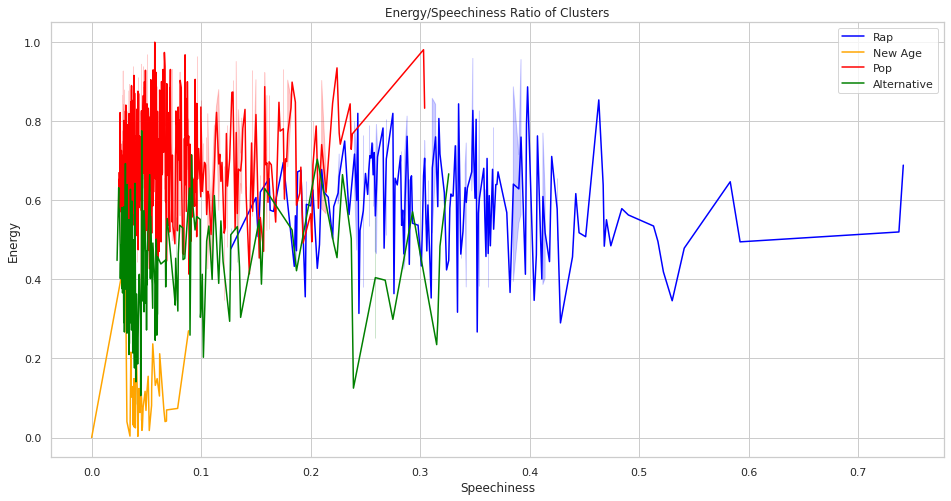

In [56]:
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
columns = [clus_0,clus_1,clus_2,clus_3]
labels = ["Rap","New Age","Pop","Alternative"]
colors = ["blue","orange","red","green"]
for i in range(len(columns)):
  ax = sns.lineplot(x=columns[i]['speechiness'],y=columns[i]['energy'],label=labels[i],color=colors[i])
ax.set_title('Energy/Speechiness Ratio of Clusters')
ax.set_ylabel('Energy')
ax.set_xlabel('Speechiness')
plt.show()

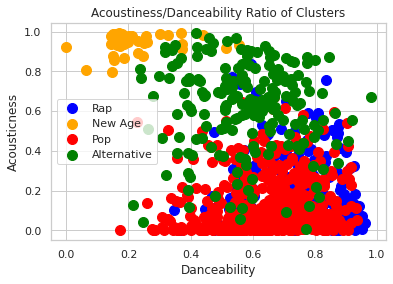

In [57]:
plt.scatter(clus_0['danceability'], clus_0['acousticness'], s=100, c='blue', label='Rap')
plt.scatter(clus_1['danceability'], clus_1['acousticness'], s=100, c='orange', label ='New Age')
plt.scatter(clus_2['danceability'], clus_2['acousticness'], s=100, c='red', label ='Pop')
plt.scatter(clus_3['danceability'], clus_3['acousticness'], s=100, c='green', label ='Alternative')
plt.title('Acoustiness/Danceability Ratio of Clusters')
plt.xlabel('Danceability')
plt.ylabel('Acousticness')
plt.legend()
plt.show()

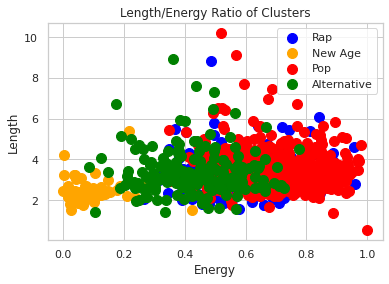

In [58]:
plt.scatter(clus_0['energy'], clus_0['length'], s=100, c='blue', label ='Rap')
plt.scatter(clus_1['energy'], clus_1['length'], s=100, c='orange', label ='New Age')
plt.scatter(clus_2['energy'], clus_2['length'], s=100, c='red', label ='Pop')
plt.scatter(clus_3['energy'], clus_3['length'], s=100, c='green', label ='Alternative')
plt.title('Length/Energy Ratio of Clusters')
plt.xlabel('Energy')
plt.ylabel('Length')
plt.legend()
plt.show()

In [59]:
clus_0

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
4,Enemy (with JID) - from the series Arcane Leag...,Enemy (with JID) [from the series Arcane Leagu...,Imagine Dragons,2021-10-28,2.889683,98,0.23700,0.728,0.783,0.000000,0.4340,-4.424,0.266,77.011,4,0
5,All Girls Are The Same,Goodbye & Good Riddance,Juice WRLD,2018-12-10,2.763650,86,0.07690,0.671,0.529,0.000335,0.0856,-7.226,0.307,161.989,4,0
16,Ain't Shit,Planet Her,Doja Cat,2021-06-25,2.904217,85,0.50600,0.855,0.488,0.000000,0.3470,-4.601,0.208,124.097,4,0
29,Wants and Needs (feat. Lil Baby),Scary Hours 2,Drake,2021-03-05,3.215933,85,0.06180,0.578,0.449,0.000002,0.1190,-6.349,0.286,136.006,4,0
31,alotta cake,DS4EVER,Gunna,2022-01-07,3.233100,79,0.18100,0.895,0.543,0.000000,0.1200,-6.766,0.298,120.078,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,93 'Til Infinity,93 'til Infinity,Souls Of Mischief,1993-02-13,4.774000,71,0.12500,0.590,0.672,0.000001,0.1470,-11.792,0.412,206.247,4,0
1716,99 Problems,The Black Album,JAY-Z,2003-11-14,3.910433,67,0.00661,0.494,0.887,0.000000,0.1030,-4.297,0.398,89.554,4,0
1740,223's (feat. 9lokknine),223's (feat. 9lokknine),YNW Melly,2019-08-09,2.944000,69,0.03880,0.932,0.547,0.000000,0.0924,-7.787,0.333,94.998,4,0
1744,223's (feat. 9lokknine),Melly vs. Melvin,YNW Melly,2019-11-22,2.944000,69,0.03880,0.932,0.547,0.000000,0.0924,-7.787,0.333,94.998,4,0


In [60]:
clus_1

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
465,Je te laisserai des mots,Je te laisserai des mots,Patrick Watson,2010-09-10,2.680883,85,0.989,0.3030,0.18700,0.489,0.1010,-16.757,0.0356,132.731,4,1
662,Nothing,To Let A Good Thing Die,Bruno Major,2020-06-05,2.713283,86,0.931,0.5550,0.27000,0.536,0.1030,-15.892,0.0884,139.691,3,1
744,O,Ghost Stories,Coldplay,2014-05-19,5.391333,64,0.911,0.3710,0.21600,0.826,0.0934,-14.727,0.0358,136.998,4,1
827,Querencia,Querencia,Cameron Sinosa,2020-11-05,3.244133,68,0.991,0.1700,0.00316,0.931,0.1110,-38.615,0.0422,70.964,3,1
1055,Vas,Triplbt Theme,jagger finn,2019-08-28,1.505383,80,0.918,0.5140,0.42400,0.849,0.1260,-10.645,0.0282,71.114,4,1
1153,YKWIM?,Bipolar,Yot Club,2019-05-31,3.545833,86,0.937,0.3720,0.53700,0.873,0.2870,-7.623,0.0305,123.735,3,1
1242,Lights Are On,Z-Sides,Tom Rosenthal,2018-10-26,3.229150,82,0.981,0.4400,0.04000,0.465,0.1110,-16.887,0.0322,135.965,4,1
1258,0.5 Hz Delta Waves - Binaural Beats,Binaural Beats - Sleep (Delta Waves),Miracle Tones,2020-11-27,2.304500,64,0.947,0.1530,0.03150,0.566,0.1130,-31.891,0.0379,135.608,4,1
1428,3.2 Hz Healing Sleep - Binaural Beats,Binaural Beats - Sleep (Delta Waves),Miracle Tones,2020-11-27,2.150333,66,0.797,0.1460,0.01780,0.592,0.1160,-32.357,0.0526,138.738,4,1
1435,396 Hz Let Go of Fear & Guilt,396 Hz Liberating Guilt and Fear,Miracle Tones,2019-10-18,2.158333,66,0.935,0.1870,0.23700,0.698,0.1110,-22.685,0.0558,141.363,4,1


In [61]:
clus_2

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,abcdefu,abcdefu,GAYLE,2021-08-13,2.810017,100,0.29900,0.695,0.540,0.000000,0.3670,-5.692,0.0493,121.932,4,2
1,All Too Well (10 Minute Version) (Taylor's Ver...,Red (Taylor's Version),Taylor Swift,2021-11-12,10.217100,93,0.27400,0.631,0.518,0.000000,0.0880,-8.771,0.0303,93.023,4,2
3,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,1994-11-01,4.018433,94,0.16400,0.336,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4,2
7,abcdefu (angrier),abcdefu (angrier),GAYLE,2021-09-24,2.663933,84,0.06580,0.671,0.599,0.000000,0.1010,-6.180,0.0405,121.849,3,2
8,Already Dead,Fighting Demons,Juice WRLD,2021-12-10,3.853667,85,0.02160,0.744,0.495,0.000000,0.1110,-6.311,0.0634,83.510,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,9 and Three Quarters - Run Away,The Dream Chapter: MAGIC,TOMORROW X TOGETHER,2019-10-21,3.531100,73,0.00550,0.639,0.756,0.000000,0.1300,-4.420,0.0606,128.931,4,2
1733,911,911,Teddy Swims,2022-01-07,2.781500,66,0.08010,0.848,0.591,0.000000,0.1440,-5.075,0.1120,98.934,4,2
1736,99 Red Balloons,Stomping Ground,Goldfinger,2000-03-28,3.819550,66,0.00103,0.285,0.843,0.000370,0.3270,-7.318,0.1290,97.051,4,2
1737,Te Boté - Remix,Te Boté (Remix),Nio Garcia,2018-04-13,6.965333,79,0.54200,0.903,0.675,0.000013,0.0595,-3.445,0.2140,96.507,4,2


In [62]:
clus_3

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
2,We Don't Talk About Bruno,Encanto (Original Motion Picture Soundtrack),Lin-Manuel Miranda,2021-11-19,3.602000,92,0.357,0.577,0.450,0.000000,0.111,-8.516,0.0834,205.863,4,3
6,Rockin' Around The Christmas Tree,Merry Christmas From Brenda Lee,Brenda Lee,1964-10-19,2.104433,91,0.614,0.589,0.472,0.000000,0.505,-8.749,0.0502,67.196,4,3
11,A Holly Jolly Christmas - Single Version,Have A Holly Jolly Christmas,Burl Ives,1965-01-01,2.258883,83,0.579,0.683,0.375,0.000000,0.076,-13.056,0.0303,140.467,4,3
13,A Tale By Quincy,Dawn FM,The Weeknd,2022-01-06,1.603867,83,0.679,0.447,0.513,0.000030,0.096,-8.670,0.1270,67.289,3,3
15,Easy On Me,Easy On Me,Adele,2021-10-14,3.744900,97,0.578,0.604,0.366,0.000000,0.133,-7.519,0.0282,141.981,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,Hex,Hex,80purppp,2018-03-12,2.037017,80,0.872,0.845,0.398,0.007130,0.159,-15.781,0.2680,109.996,4,3
1717,911,Chaotic,Ellise,2021-05-14,3.139767,73,0.509,0.765,0.530,0.000004,0.117,-7.180,0.0833,130.104,4,3
1722,9 AM in Calabasas,9 AM in Calabasas,808 DEAD,2021-06-19,4.416000,67,0.116,0.396,0.381,0.614000,0.116,-18.517,0.0676,124.994,4,3
1729,NI BIEN NI MAL,X 100PRE,Bad Bunny,2018-12-23,3.936917,77,0.556,0.826,0.449,0.000018,0.273,-8.330,0.0674,128.028,4,3
